In [25]:
import torch
import numpy as np

shape = (2,3,)
ones_tensor = torch.ones(shape)
data = [[1,2], [3,4], [5,6]]
dataTensor = torch.tensor(data)
print(dataTensor[1,1])

tensor(4)


In [34]:
import torch 
from torchvision.models import resnet18, ResNet18_Weights

model = resnet18(weights = ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
# print(data)
labels = torch.rand(1, 1000)

#forward pass
predict = model(data)

#calculate loss
loss = (predict-labels).sum()
loss.backward()

#call optimizer
optim = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

#initiate gradient descent
optim.step()

In [8]:
#defined neural network

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
#print(net)

input = torch.randn(1, 1, 32, 32)

#forward pass
out = net(input)
# print(out)

#zeroing gradients
net.zero_grad()
out.backward(torch.randn(1, 10))

#loss function loss(output, target)
target = torch.randn(1, 10)
# print(target)
target = target.view(1, -1)
# print(target)
lossFunc = nn.MSELoss()

loss = lossFunc(out, target)
print(loss)

#called backprop
loss.backward()

#optimizer created
optimizer = optim.SGD(net.parameters(), lr=0.01)

optimizer.zero_grad()
optimizer.step()







RuntimeError: ignored

In [2]:
#training classifier - load and normalize dataset

#input data - 3 channels, 32x32

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

sampleSize = 4

trainSet = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)

trainLoader = torch.utils.data.DataLoader(trainSet, batch_size = sampleSize, shuffle = True, num_workers = 2)

testSet = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform)

testLoader = torch.utils.data.DataLoader(testSet, batch_size = sampleSize, shuffle = False, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


12500


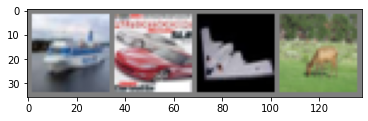

ship  car   plane deer 


In [36]:
import matplotlib.pyplot as plt
import numpy as np

# func to show image

def imshow(img):
  img = img/2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()


dataiter = iter(trainLoader)
images, labels = next(dataiter)
print(len(trainLoader))

# show images
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(sampleSize)))

[6.808985424785614, 5.223726128032207, 4.682260878936052, 4.3137700354492665, 4.0501335921683905]
Finished Training


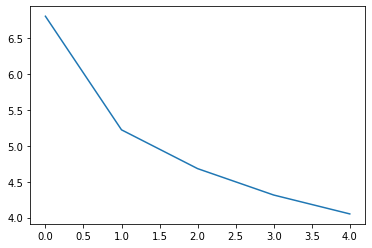

In [52]:
#defined neural network

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = self.pool(F.relu(self.conv1(x)))
        # If the size is a square, you can specify with a single number
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

#define loss function
lossFunc = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#training the network
loss_values = []
for epoch in range(5):

  running_loss = 0.0
  for i, data in enumerate(trainLoader, 0):
    inputs, labels = data

    #1. zero parameter grad
    optimizer.zero_grad()

    #2. Forward pass
    outputs = net(inputs)

    #3. calc loss function
    loss = lossFunc(outputs, labels)

    #4. Backward pass
    loss.backward()

    #5. Update gradients
    optimizer.step()

    #stats
    running_loss += loss.item() * inputs.size(0)
    #print(loss.item())
    # if i%2000 == 1999:
    #   print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
    #   running_loss = 0.0
  loss_values.append(running_loss/len(trainLoader))

print(loss_values)
plt.plot(loss_values)
  
print('Finished Training')


      


44529.91182545014
[3.562392946036011]
44529.91188837029
[3.562392946036011, 3.562392951069623]
44529.91183702275
[3.562392946036011, 3.562392951069623, 3.56239294696182]
44529.911861516535
[3.562392946036011, 3.562392951069623, 3.56239294696182, 3.562392948921323]
44529.91182444617
[3.562392946036011, 3.562392951069623, 3.56239294696182, 3.562392948921323, 3.562392945955694]


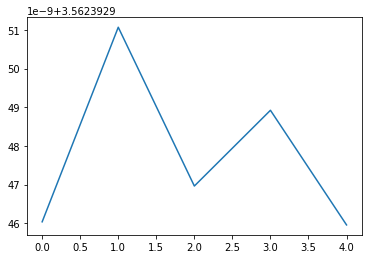

In [49]:
#sample loop
loss_values = []
for epoch in range(5):
  running_loss = 0.0
  for i, data in enumerate(trainLoader, 0):
    inputs, labels = data
    outputs = net(inputs)
    loss = lossFunc(outputs, labels)
    running_loss += loss.item() * inputs.size(0)
  loss_values.append(running_loss/len(trainLoader))
  print(running_loss)
  print(loss_values)
plt.plot(loss_values)

In [7]:
#saving model

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

tensor([3, 8, 8, 0])


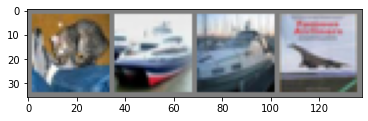

Ground Truth: cat   ship  ship  plane


In [28]:
#test on test data
dataiter = iter(testLoader)
images, labels = next(dataiter)

print(labels)
imshow(torchvision.utils.make_grid(images))
print('Ground Truth:', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [15]:
#loaded saved model
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [25]:
#predicted by model
outputs = net(images)
print(outputs.data)
_, predicted = torch.max(outputs, 1)
print(_)
print(predicted)
print('Predicted: ', ''.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

tensor([[-1.5176, -1.6839, -0.6402,  2.9384, -0.1327,  2.8157,  0.2840, -0.5578,
         -0.1412, -1.5694],
        [ 5.7279,  4.0180, -2.3888, -3.3570, -3.3183, -3.8570, -4.5398, -0.9958,
          5.5200,  3.5607],
        [ 2.4070,  2.2644,  0.0506, -1.3559, -1.9881, -1.3747, -2.5662, -0.1198,
          1.5801,  1.2724],
        [ 5.7265, -1.5199,  2.1939, -1.6004,  1.4000, -4.2321, -2.5428, -3.8884,
          4.2462, -0.3738]])
tensor([2.9384, 5.7279, 2.4070, 5.7265], grad_fn=<MaxBackward0>)
tensor([3, 0, 0, 0])
Predicted:  cat  planeplaneplane


In [26]:
# accuracy over the whole dataset
correct= 0
total = 0

with torch.no_grad():
  for data in testLoader:
    images, labels = data

    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')




Accuracy of the network on the 10000 test images: 61 %


In [30]:
# classes that performed well
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# print(correct_pred)

with torch.no_grad():
  for data in testLoader:
    images, labels = data
    outputs = net(images)
    _, predictions = torch.max(outputs.data, 1)

    for label, predict in zip(labels, predictions):
      if label == predict:
        correct_pred[classes[label]] += 1
      total_pred[classes[label]] += 1

#print accuracy for each class
for classname, correct_count in correct_pred.items():
  accuracy = 100* float(correct_count) / total_pred[classname]
  print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')


Accuracy for class: plane is 67.4 %
Accuracy for class: car   is 74.5 %
Accuracy for class: bird  is 49.8 %
Accuracy for class: cat   is 43.4 %
Accuracy for class: deer  is 44.4 %
Accuracy for class: dog   is 41.6 %
Accuracy for class: frog  is 79.7 %
Accuracy for class: horse is 70.6 %
Accuracy for class: ship  is 76.2 %
Accuracy for class: truck is 70.4 %
